In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode

In [22]:
def findBest(Tmax,G,p,q,a):
    t=0
    bestLength= 1000000000000.0
    bestT = t
    while t >= Tmax:
        b = (q - G * (p**2) - t)/p
        if p>0:
            x =np.linspace(0, p, num=50)
        elif p < 0:
            x =np.linspace(p, 0, num=50)
        lot = np.sqrt(1+(2*G*x + ((q-G*(p**2)-t)/p))**2)
        y= a*(lot) +(1-a)*(lot - t)
        length = scipy.integrate.trapezoid(y,x)
        if length < bestLength:
            #ploting(Tmax,p,q,bestT,G) #comparing possible lines
            bestLength = length
            bestT = t
        t = t - 0.01 #last 
    #ploting(Tmax,p,q,bestT,G)
    #print("length: " + str(bestLength) +" t= " + str(bestT))
    return(bestLength,bestT)

In [23]:
def ploting(Tmax, Array):
    y= np.linspace(Tmax,0)
    x=0*y
    trace1 = go.Scatter(x=x,y=y)
    Array.append(trace1)
    iplot(Array)

In [26]:
def plotArray(Tmax,G,p,q,a):
    findArray = findBest(Tmax,G,p,q,a)
    t= findArray[1]
    x1=np.linspace(0,p)
    b=(q - G*(p**2) -t)/p
    y1=G * x1**2 + b*x1 + t
    trace2 =go.Scatter(x=x1,y=y1,mode='lines', name= str(findArray[0]))
    return trace2

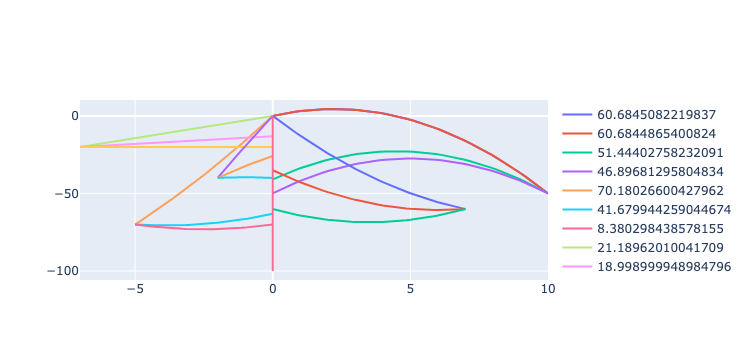

In [27]:
Array=[]
Array.append(plotArray(-100.0,-.9,10.0,-50,0))
Array.append(plotArray(-100.0,-.9,10.0,-50,0.945))
Array.append(plotArray(-100.0,-.9,10.0,-50,0.99))
Array.append(plotArray(-100.0,-.9,10.0,-50,1))
Array.append(plotArray(-100,0.5,-5,-70,0))
Array.append(plotArray(-100,0.5,-5,-70,.9))
Array.append(plotArray(-100,0.5,-5,-70,1))
Array.append(plotArray(-100,0,-7,-20,0))
Array.append(plotArray(-100,0,-7,-20,.9))
Array.append(plotArray(-100,0,-7,-20,1))
Array.append(plotArray(-100,.7,7,-60,0))
Array.append(plotArray(-100,.7,7,-60,.9))
Array.append(plotArray(-100,.7,7,-60,1))
Array.append(plotArray(-100,-.5,-2,-40,0))
Array.append(plotArray(-100,-.5,-2,-40,.505))
Array.append(plotArray(-100,-.5,-2,-40,1))
ploting(-100.0,Array)